**YOUR NAMES HERE**

Spring 2021

CS 251: Data Analysis and Visualization

Project 5: Clustering

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

In [2]:
import pandas as pd

In [3]:
super_simple = pd.read_csv('data/super_simple.csv')
super_simple = super_simple.values

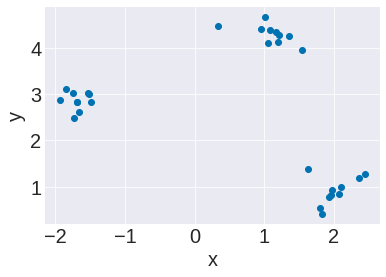

In [4]:
plt.scatter(super_simple[:,0],super_simple[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$ for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [5]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [6]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0 , :] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [7]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [8]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [9]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `update_labels`

In [10]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

In [11]:
# testing speeds of different methods of implementation to update the labels
%timeit new_labels = cluster.update_labels(centroids = init_centroids,matix_mult_dist_calc=False)

394 µs ± 8.24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
# testing speeds of different methods of implementation to update the labels
%timeit new_labels = cluster.update_labels(init_centroids)


29.3 µs ± 794 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
new_labels = cluster.update_labels(init_centroids)


From my timeit testing I can see that the method with matrix multication versus the one useing loops is much quicker
This makes a lot of sense as it has fallen in line with all else that I have learned about how for loops are very inificient in
python and that vectorization is always a good idea for time optimization

In [14]:
print(f'After the first update data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first update data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids`

In [15]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)


In [16]:
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[0.75287 0.17425]
 [0.15877 0.25313]
 [0.21407 0.3757 ]]


You should see:

    After the first centroid update, your cluster assignments are:
        [[ 1.09087  4.29295]
         [-1.68133  2.85917]
         [ 2.00717  0.9184 ]]
    Your difference from previous centroids:
        [[ 0.75287 -0.17425]
         [ 0.15877 -0.25313]
         [ 0.21407  0.3757 ]]

#### Test `inertia`

In [17]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.5351458122391608
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot. Make sure that the cluster assignment looks like the following image:

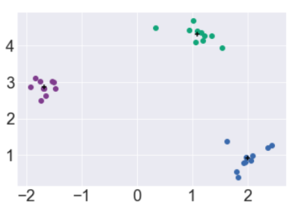

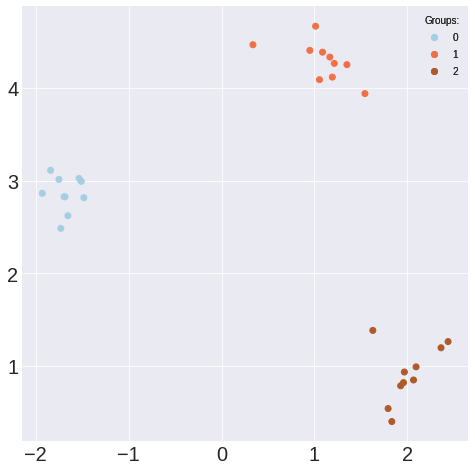

In [18]:
np.random.seed(0)
cluster.cluster(k = 3)
cluster.plot_clusters()
plt.show()

#1## 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

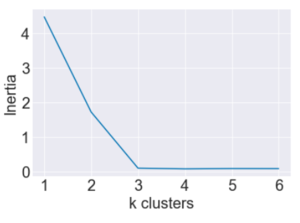


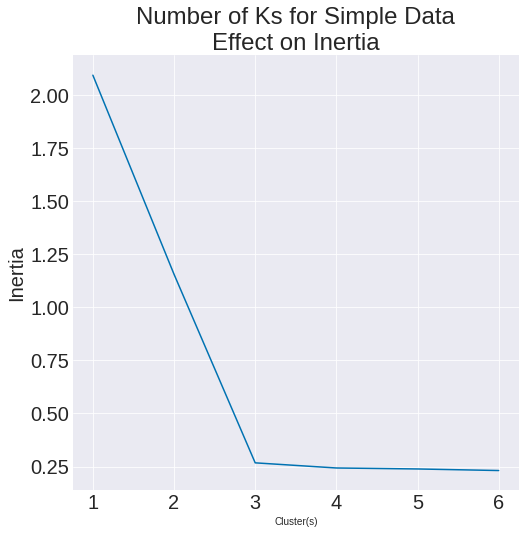

In [19]:
cluster.elbow_plot(6,title = f'Number of Ks for Simple Data\nEffect on Inertia')
plt.show()

**Question:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer:** 
There are 3 because I can see that is where the inertia gets the smallest and has the greatest ammount of change using ank more clusters would lead to over fitting as shown by the elbow plot

#### Determine number of clusters in `five_blobs` dataset

- Load in the `five_blobs` dataset.
- Run K-means on it.
- Create a scatterplot to visualize the clustering.
- Create an elbow plot showing the inertia with different $k$ values

**NOTE:** Keep the random seed line below.

In [20]:
np.random.seed(3)

In [21]:
# Here I am reading in the data from the CSV file
five_blobs = pd.read_csv('data/five_blobs.csv')
five_blobs

,x,y
0,-11.7673,6.1297
1,-9.9971,7.3406
2,-12.5534,6.2580
3,-11.1306,8.0086
4,-9.6852,10.1164
...,...,...
2045,-5.1898,29.7083
2046,-9.2009,29.1111
2047,-11.6003,32.4606
2048,-9.6823,27.0376


From this I can see five_blobs is a dataset with 2050 samples with 2 features each

I then took its values and loaded them into the Kmean object

In [22]:
five_blobs_cluster = kmeans.KMeans(five_blobs.values)

Now I am going to make an elbow plot for the dataset

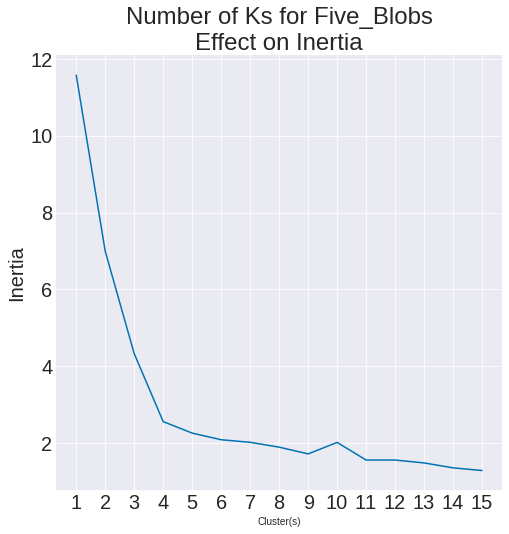

In [23]:
five_blobs_cluster.elbow_plot(15,title = f'Number of Ks for Five_Blobs\nEffect on Inertia')
plt.show()

The elbow plot does not make it exactly clear how many clusters to look for, due to multiple reasons.
The first is that there is not a clear point that the inertia changes by the most in an optimal (decreasing) way because
it appears to decrease as it reaches 5 clusters but then there is a slight hyperbolic increase then decrease again in inertia
as the number of groups goes from 5 to 9.

because of this I am going to show the scatter plot with 5 clusters

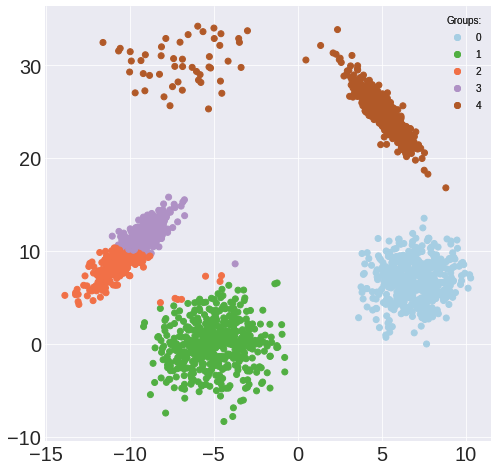

In [24]:
five_blobs_cluster.cluster(k = 5)
five_blobs_cluster.plot_clusters(title="Five_Blobs Scatter Plot")
plt.show()

**Question:** What's wrong with clusters shown in the scatterplot? Why does it happen?

**Answer:** 

When looking at the scatter plot for the Five_blobs with 5 clusters I can see that visualy without looking at the color (cluster assighnment)
of each data point it still apears that there are naturally 5 groups in the data. however the problem is that the clusting of all the data by kmeans is wrong with
it splitting some data points of what appear to be the same cluster into differnet clusters and also combine data of what should be into different clusters into the same cluster.


This can be explained because it appears that covariance of some clusters is differnt (IDK GO BACK TO)

This also can eb explained because the K means algorithim is running until it reaches a local maimum of the intertia for tha ammoutn of Ks but not the global maximum.
This can be explained because of poor initial starting conditions.

**Question:** Based on the elbow plot, how many clusters are there? Is it easy or hard to determine? Does it make sense?

**Answer:** 
As I said earlier "

#### Run K-means multiple times, save the best clustering

To address the problems faced above, we can run K-means multiple times and take the best results for our clustering.

- Implement `cluster_batch` to run K-means multiple times with a sensible $k$ value.
- Run `plot_clusters` again.

**NOTE:** Keep the random seed line below.


First I am going to make an elbow plot with batch clustering

(<Figure size 864x864 with 1 Axes>,
 <AxesSubplot:title={'center':'five blobs Inertia vs # Clusters\nUp tp 6'}, xlabel='Cluster(s)', ylabel='Inertia'>)

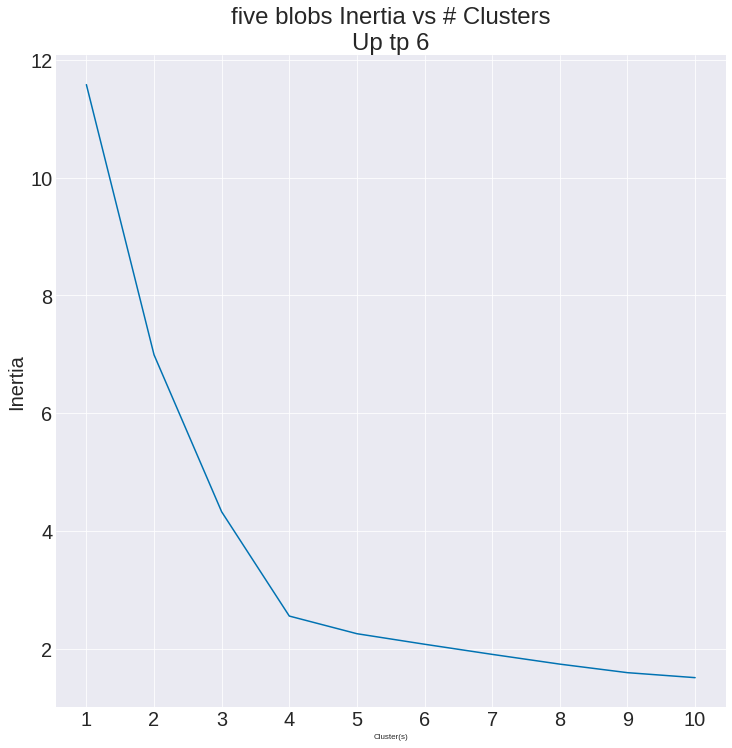

In [25]:
five_blobs_cluster.elbow_plot(max_k=10,title='five blobs Inertia vs # Clusters\nUp tp 6', font_size=8, fig_sz=(12,12),
                             cluster_method='batch',batch_iters=100,max_iter= 200)

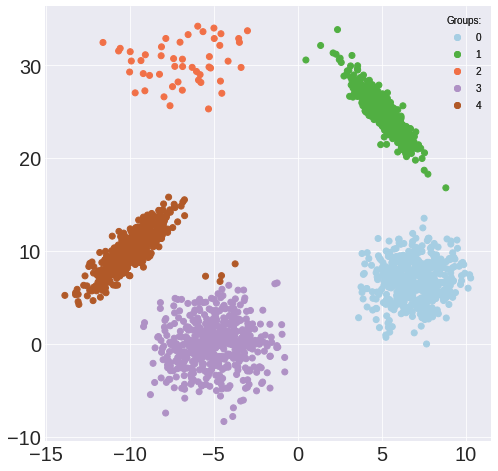

In [26]:
np.random.seed(3)
five_blobs_cluster.cluster_batch(k = 5, n_iter=100,max_iter=1000)
five_blobs_cluster.plot_clusters(title="Five_Blobs Scatter Plot")
plt.show()

**Question:** Did the clustering improve? Why?

**Answer:** 
It did because I found global maximum

## Task 2: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

I am going to import my ploy_img function I created from last project to clean things up

In [27]:
from matplotlib.image import imread

def plot_img(ax, image_array, title = ''):

    if len(image_array.shape) == 2:
        img_plot = ax.imshow(image_array,cmap=plt.get_cmap('gray'))
    elif len(image_array.shape) == 3:
        img_plot = ax.imshow(image_array)

    ax.set_title(title)
    ax.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    return ax

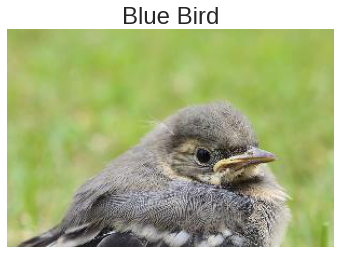

In [28]:
blue_bird_img = imread('data/baby_bird.jpeg')

fig, axes = plt.subplots(1,1)
plot_img(axes,blue_bird_img,'Blue Bird')
plt.show()

### 2b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [29]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    flatten_img = img.reshape(img.shape[0]*img.shape[1],img.shape[2])
    return flatten_img

In [30]:
blue_bird_flattened = flatten(blue_bird_img)


### 2c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [31]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)

Now I am going to make an elbow plot for the blue bird image
First before using the single method and then using the batch method for clustering (helps not get stuck at locacl maximum)
I am going to see how long it takes to do 5 cluster batches for k = 6 with L1 and L2 norm using time it

In [41]:
%%timeit
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 6, n_iter=5)



3.3 s ± 526 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%%timeit
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 6, n_iter=5, distance_calc_method='L1')

KeyboardInterrupt: 

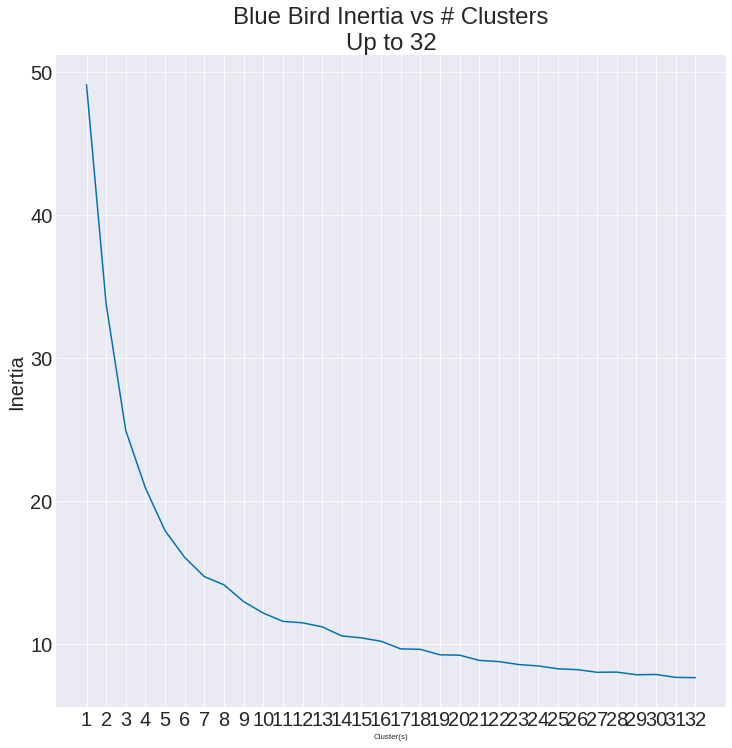

In [33]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.elbow_plot(32,title='Blue Bird Inertia vs # Clusters\nUp to 32', font_size=8, fig_sz=(12,12),
                             cluster_method='batch',batch_iters=4)
plt.show()

KeyboardInterrupt: 

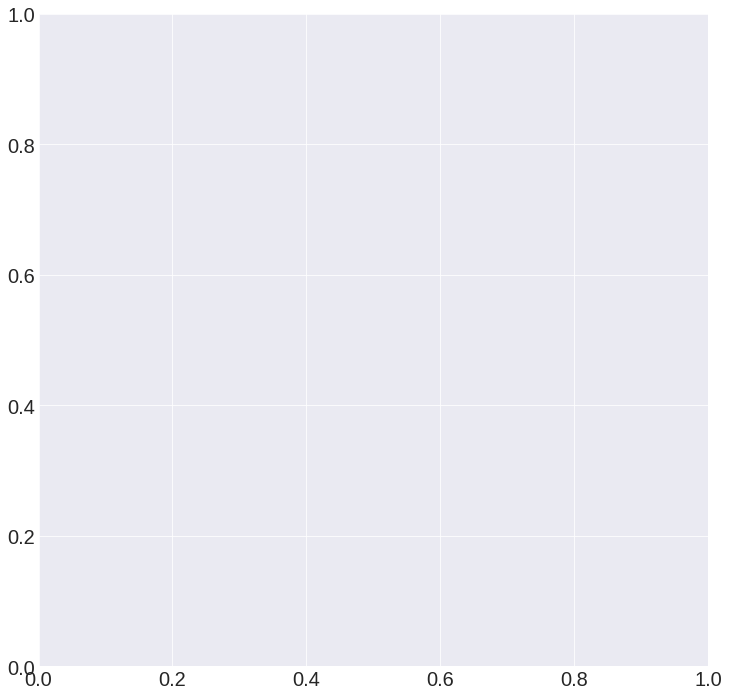

In [34]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.elbow_plot(32,title='Blue Bird Inertia vs # Clusters\nUp to 16', font_size=8, fig_sz=(12,12),
                             cluster_method='batch',batch_iters=5,distance_calc_method= 'L1')
plt.show()

Grom here it shows by implementing l1 distance the variance varies more over time but it is also in a much
smaller y range so the scaling is a bit off and overall it is much more accurate with a lower intertia

Trying one more big elbow plot up to 50 with large batch size


(warning the runtime is very very long so not advised to actually run in the notebook)

In [ ]:
# blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
# blue_bird_cluster.elbow_plot(50,title='Blue Bird Inertia vs # Clusters\nUp tp 50', font_size=7, fig_sz=(15,15),
#                              cluster_method='batch',batch_iters=2)
# plt.show()
#



In [ ]:
# running k means with k = 2 no batching
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster(k = 2)

In [ ]:
# replacing data with nearest cluster
blue_bird_cluster.replace_color_with_centroid()

### 2d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

In [54]:
#writing function to reshape data
def reshape_compressed_image(x,y,z,kmeans_obj, data_type = 'uint8'):
    reshaped_data = kmeans_obj.get_data()
    reshaped_data = reshaped_data.reshape(x,y,z)
    reshaped_data = reshaped_data.astype(data_type)
    return reshaped_data

In [ ]:
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 2 Cluster Compresion')
plt.show()


before I start adding more clusters I am also going to run k means clusting with l1 distance since pixels
are shaped in that sort of way (kind of like city blocks)


In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 2, n_iter = 5,distance_calc_method='L1')
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 2 Cluster Compresion L1, 5 batches')
plt.show()

Now I am going to try with batch clustering and different cluster ammounts as well

First I will test for batch clustering for 2 clusters

In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 2, n_iter = 5)
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 2 Cluster Compresion 5 batches')
plt.show()


Now trying with k = 16

In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 16, n_iter = 5)
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 16 clusters')
plt.show()

Now I am trying with 256 clusters since the rgb color scale ranges from 0 to 255

In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 256, n_iter = 2)
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 256 clusters')
plt.show()

Now I am trying with 128 clusters since the rgb color scale ranges from 0 to 255

I am going to use a normal non downscaled picture of a bike to show a greater change in the image size

In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 128, n_iter = 2)
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 128 clusters')
plt.show()


Now I am trying with 64 clusters since the rgb color scale ranges from 0 to 255

In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 64, n_iter = 2)
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 64 clusters')
plt.show()


Now I am trying with 32 clusters since the rgb color scale ranges from 0 to 255

In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 32, n_iter = 2)
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 32 clusters')
plt.show()

Now I am trying with 16 clusters since the rgb color scale ranges from 0 to 255

In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 16, n_iter = 2)
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 16 clusters')
plt.show()

Now I am trying with 4 clusters since the rgb color scale ranges from 0 to 255

In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 4, n_iter = 2)
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 4 clusters')
plt.show()

Now I am trying with 3 clusters since the rgb color scale ranges from 0 to 255

In [ ]:
blue_bird_cluster = kmeans.KMeans(blue_bird_flattened)
blue_bird_cluster.cluster_batch(k = 3, n_iter = 2)
blue_bird_cluster.replace_color_with_centroid()
two_cluster_blue_bird = reshape_compressed_image(202,303,3,blue_bird_cluster)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_blue_bird,'Blue Bird 3 clusters')
plt.show()

### 2e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

I am going to run K-means on a picture of a downhill mountian bike (2021 trek session 8)

Here is the original immage below

In [ ]:
trek_session_img = imread('data/trekSession.jpg')

fig, axes = plt.subplots(1,1)
plot_img(axes,trek_session_img,'2021 Trek Session Original Image')
plt.show()


Looking at the size of the original image to see if I should trey and rescale it to reduce the ammount of data

In [ ]:
trek_session_img.shape

This is quite a big image with a 914x1596 dimension so I am going to try and downscale it with open cv first

In [ ]:
import cv2

trek_session_img_cv = cv2.imread('data/trekSession.jpg',3)
#cv im read reads in as bgr not rgb so fixing that
b,g,r = cv2.split(trek_session_img_cv)
trek_session_img_cv = cv2.merge([r,g,b])
trek_session_rescaled = cv2.resize(trek_session_img_cv,(int(np.round(trek_session_img_cv.shape[1]/4)),int(np.round(trek_session_img_cv.shape[0]/4))))
fig, axes = plt.subplots(1,1)
plot_img(axes,trek_session_rescaled,'2021 Trek Session resized by half Image')
plt.show()


As you can see the rescaled one is much less data while still maintaining the look and characteristics of the bike

So now with the rescaled data I am going to do K means clustering on it and make an elbow plot

In [ ]:
trek_session_rescaled_flat = flatten(trek_session_rescaled)
trek_session_kmeans = kmeans.KMeans(trek_session_rescaled_flat)


In [ ]:
trek_session_kmeans.elbow_plot(10,title='Trek Session Inertia vs # Clusters\nUp tp 32 L2, 4 batchs', font_size=8, fig_sz=(12,12),
                             cluster_method='single',batch_iters=4,distance_calc_method='L2')
plt.show()

In [ ]:
trek_session_kmeans.elbow_plot(10,title='Trek Session Inertia vs # Clusters\nUp tp 32 L1, 4 batchs', font_size=8, fig_sz=(12,12),
                             cluster_method='single',batch_iters=4,distance_calc_method='L1')
plt.show()


Showing with just 2 clusters for L1 and L2

In [ ]:
trek_session_kmeans = kmeans.KMeans(trek_session_rescaled_flat)
trek_session_kmeans.cluster_batch(k = 2, n_iter = 5)
trek_session_kmeans.replace_color_with_centroid()
two_cluster_trek_session = reshape_compressed_image(trek_session_rescaled.shape[0],trek_session_rescaled.shape[1],3,trek_session_kmeans)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_trek_session,'Trek Session 2 clusters, 5 batches, L2')
plt.show()


In [ ]:
trek_session_kmeans = kmeans.KMeans(trek_session_rescaled_flat)
trek_session_kmeans.cluster_batch(k = 2, n_iter = 5,distance_calc_method= 'L1')
trek_session_kmeans.replace_color_with_centroid()
two_cluster_trek_session = reshape_compressed_image(trek_session_rescaled.shape[0],trek_session_rescaled.shape[1],3,trek_session_kmeans)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_trek_session,'Trek Session 2 clusters, 5 batches, L1')
plt.show()


Showing with 31 clusters for l1 and l2.

L1 will be particuarly interesting because that is where both have low intertia

In [ ]:
trek_session_kmeans = kmeans.KMeans(trek_session_rescaled_flat)
trek_session_kmeans.cluster_batch(k = 31, n_iter = 5)
trek_session_kmeans.replace_color_with_centroid()
two_cluster_trek_session = reshape_compressed_image(trek_session_rescaled.shape[0],trek_session_rescaled.shape[1],3,trek_session_kmeans)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_trek_session,'Trek Session 31 clusters, 5 batches, L2')
plt.show()

In [ ]:
trek_session_kmeans = kmeans.KMeans(trek_session_rescaled_flat)
trek_session_kmeans.cluster_batch(k = 31, n_iter = 5, distance_calc_method= 'L1')
trek_session_kmeans.replace_color_with_centroid()
two_cluster_trek_session = reshape_compressed_image(trek_session_rescaled.shape[0],trek_session_rescaled.shape[1],3,trek_session_kmeans)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_trek_session,'Trek Session 31 clusters, 5 batches, L1')
plt.show()

looking at 13 clusters right before steep decrese for l1

In [ ]:
trek_session_kmeans = kmeans.KMeans(trek_session_rescaled_flat)
trek_session_kmeans.cluster_batch(k = 13, n_iter = 5, distance_calc_method= 'L1')
trek_session_kmeans.replace_color_with_centroid()
two_cluster_trek_session = reshape_compressed_image(trek_session_rescaled.shape[0],trek_session_rescaled.shape[1],3,trek_session_kmeans)
fig, axes = plt.subplots(1,1)
plot_img(axes,two_cluster_trek_session,'Trek Session 13 clusters, 5 batches, L1')
plt.show()


ALl of this is taking time so I am going to implement kmeans pp clustering as an option for initialization

Now I am going to test and see how much quicker k-means++ is for L2


In [ ]:
%%timeit
trek_session_kmeans = kmeans.KMeans(trek_session_rescaled_flat)
trek_session_kmeans.elbow_plot(10,title='Trek Session Inertia vs # Clusters\nUp tp 32 L2, 4 batchs, K-means++', font_size=8, fig_sz=(12,12),
                             cluster_method='single',batch_iters=4,distance_calc_method='L2', init_method = '++')


In [ ]:
%%timeit
trek_session_kmeans = kmeans.KMeans(trek_session_rescaled_flat)
trek_session_kmeans.elbow_plot(10,title='Trek Session Inertia vs # Clusters\nUp tp 32 L2, 4 batchs, Normal K-means', font_size=8, fig_sz=(12,12),
                             cluster_method='batch',batch_iters=4,distance_calc_method='L2')


Can see that with k-means ++ it is faster by a few seconds


For my last part I will show how compression can be used to decrease the size of an image when it is saved.

To do this I will run k means clusting from 2 to 256 cluster (holding all the posible rgb values of the color scale.
as K increases so will the size of the photo being saved. When it is clustereed with 256 variables it will be the same size
as the original photo, will use L2 norm)

In [43]:
import matplotlib.image as mpimg

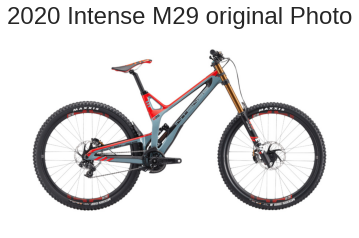

In [44]:
intense_m29_img = imread('https://p.vitalmtb.com/photos/products/28620/photos/54903/s1600_photo_734056.jpg?1578283962', 'jpg')
fig, axes = plt.subplots(1,1)
plot_img(axes,intense_m29_img,'2020 Intense M29 original Photo')
plt.show()
mpimg.imsave('photoResults/intenseM29/originalM29.jpg', intense_m29_img)


In [45]:
# Flatten the data
flatten_intense_m29 = flatten(intense_m29_img)

In [ ]:
%%timeit
intense_m29_kmeans = kmeans.KMeans(flatten_intense_m29)
intense_m29_kmeans.elbow_plot(10,title='Intense M29 Inertia vs # Clusters\nUp tp 10 L2, 4 batchs, K-means++', font_size=8, fig_sz=(12,12),
                             cluster_method='single',batch_iters=4,distance_calc_method='L2', init_method = '++')


In [ ]:
for i in range(2,256):
    intense_m29_kmeans = kmeans.KMeans(flatten_intense_m29)
    intense_m29_kmeans.cluster_batch(k = i, n_iter = 5, init_method= '++')
    intense_m29_kmeans.replace_color_with_centroid()
    intense_m29_reshaped = reshape_compressed_image(intense_m29_img.shape[0],intense_m29_img.shape[1],3,intense_m29_kmeans)
    mpimg.imsave(f'photoResults/intenseM29/M29_k_{i}.jpg', intense_m29_reshaped,format = 'jpg')

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. siloutte score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

### 5) Animate the clustering process

- Make an animation showing K-means clustering unfolding across iterations until the algorithm converges. 